#### Importing packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

#### Reading data

In [3]:
df_train = pd.read_csv('Train_LoanPrediction.csv')
df_test = pd.read_csv('Test_LoanPrediction.csv')

In [5]:
# first 5 observations from training set
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# dataset dimentions
df_train.shape

(614, 13)

In [7]:
# update setting to display 150 rows
pd.options.display.max_rows = 150

#### Missing values treatment :-

In [8]:
# check if dataset has any 'NaN' values
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# import package to plot the missing values.
import missingno as msno

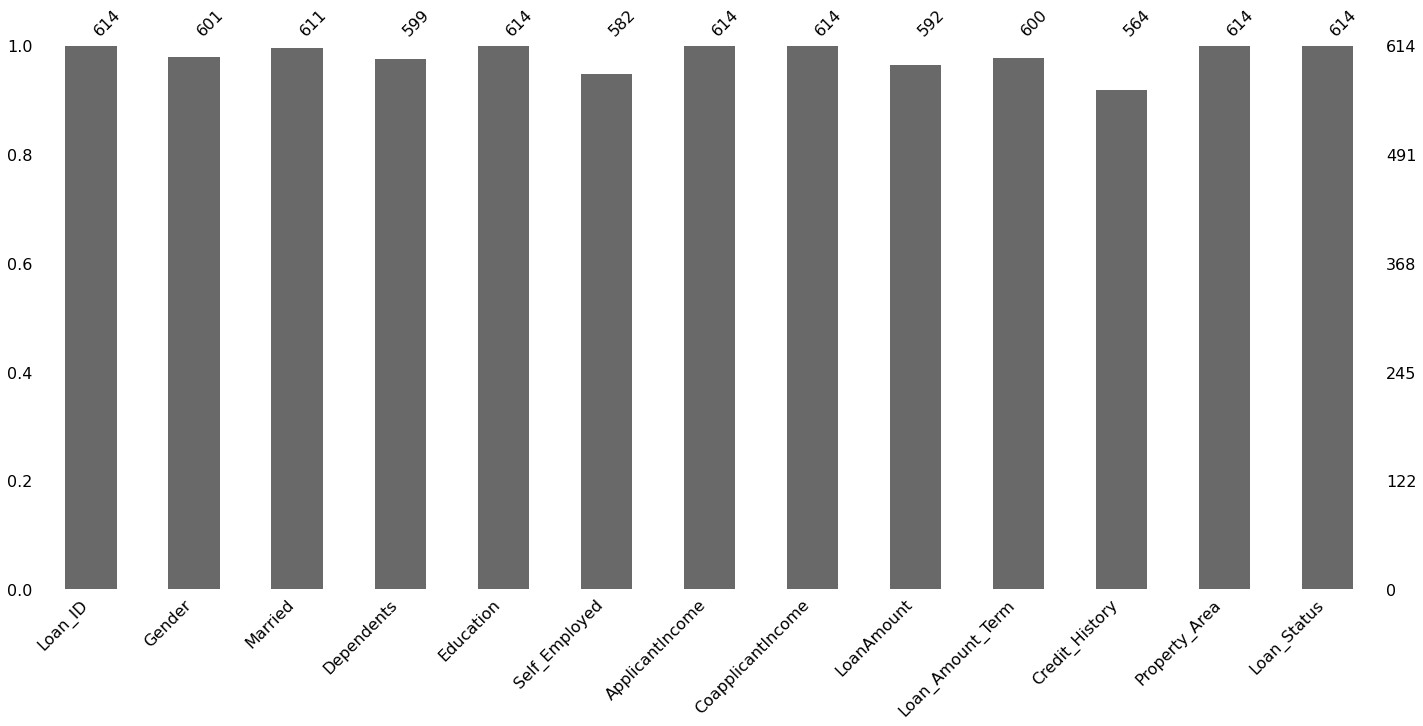

In [17]:
# plot the missing values from dataset
msno.bar(df_train)
plt.show()

In [18]:
# 5 observations from data with having atleast one NaN value.
df_train[df_train.isna().any(axis=1)].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N


In [19]:
# check how many rows have atleast 1 NaN value.
df_train[df_train.isna().any(axis=1)].shape

(134, 13)

In [20]:
# check if any row has all the 'NaN' values
df_train[df_train.isna().all(axis=1)].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


### Distribution of Target variable

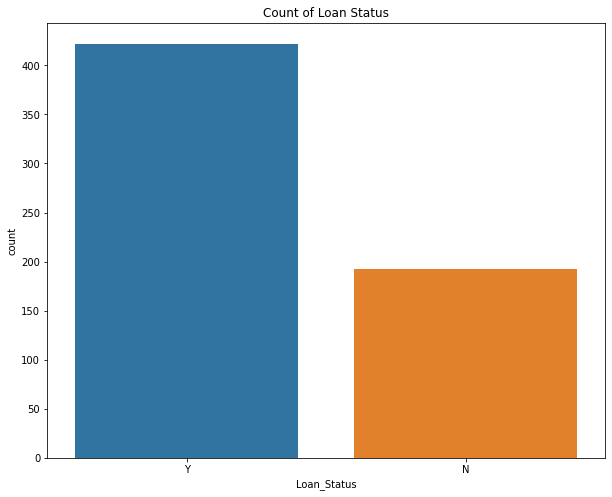

In [22]:
fig , ax = plt.subplots(figsize=(10,8))
sns.countplot(x='Loan_Status', data=df_train)
plt.title('Count of Loan Status')
plt.show()

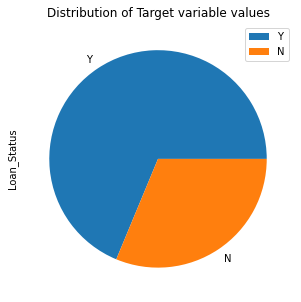

In [23]:
# Distribution of Target variable usinf pie chart
df_train['Loan_Status'].value_counts().plot(kind='pie',title = 'Distribution of Target variable values',grid=True,legend=True,figsize=(8,5))
plt.show()

In [ ]:
# Pandas Profiling
 
!pip install pandas==0.25


     |████████████████████████████████| 10.5MB 11.7MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 0.25.0 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement pandas>=1.0.4, but you'll have pandas 0.25.0 which is incompatible.
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


In [ ]:
# create profile report for analysis of dataset
import pandas_profiling as pp

pp.ProfileReport(df_train)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,13
Number of observations,614
Total Missing (%),1.9%
Total size in memory,62.5 KiB
Average record size in memory,104.2 B
Numeric,5
Categorical,7
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [24]:
# imputing missing values with mode in dataset
df_train.fillna(df_train.mode().iloc[0],inplace=True)

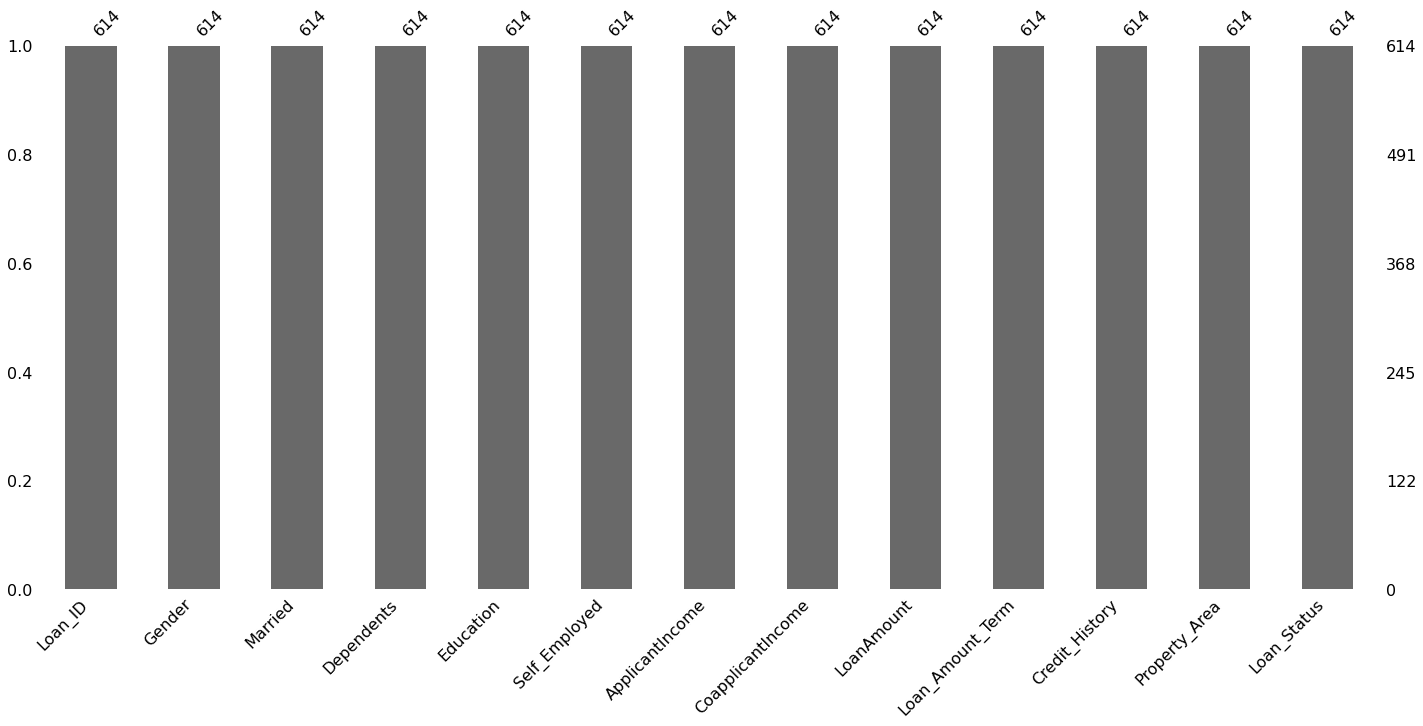

In [25]:
# plot the missing values from dataset after imputing the values with mode. 
msno.bar(df_train)
plt.show()

## Below graph shows that all features are now having 614 rows which means no missing values are exists now in dataset

In [ ]:
# get dataset info to get column type details.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# get dataset 5-number summary/ statistics for both categorical and numeric features.
df_train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002556,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,502,401,360,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,145.465798,342.410423,0.855049,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,84.180967,64.428629,0.352339,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,125.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


In [26]:
# drop Loan_ID column from dataset
df_train_new=df_train.drop('Loan_ID',axis=1)

In [27]:
# selecting categorical columns from dataset
categorical_cols = list(df_train_new.select_dtypes(include='object'))
print ('categorical_cols  :', categorical_cols)

categorical_cols  : ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [28]:
# selecting numerical columns from dataset
numeric_cols = list(df_train_new.select_dtypes(include='number'))
print ('numeric_cols  :', numeric_cols)

numeric_cols  : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


## Distribution of target with respect to features in dataset

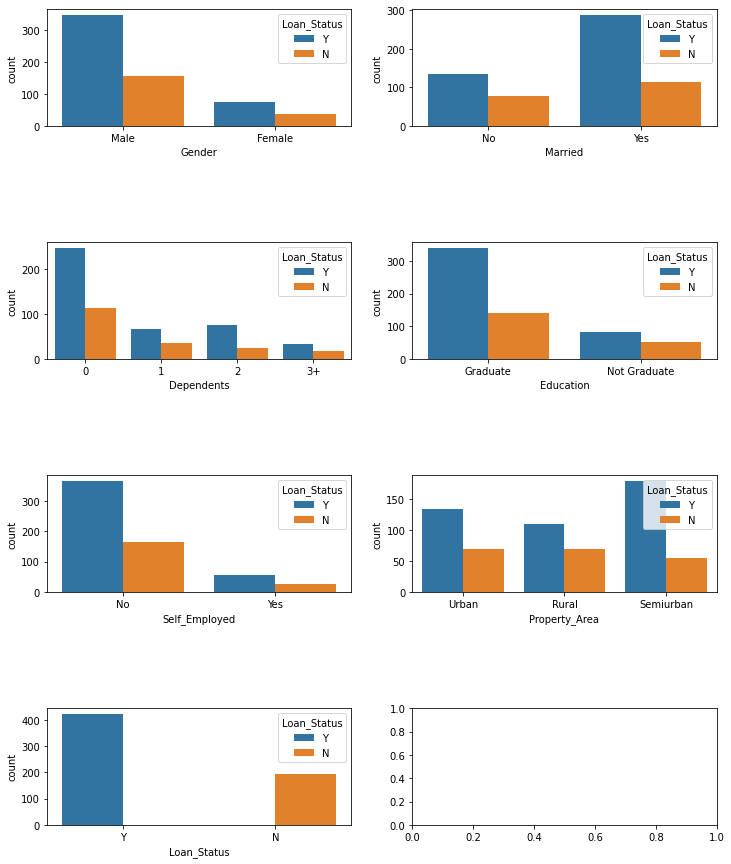

In [29]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_cols):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df_train_new,hue='Loan_Status',ax=axes[row,col])

plt.subplots_adjust(hspace=1)


# Above grapths provides the following insides from the dataset:

#### 1.Loan Approval Status: About 2/3rd of applicants have been granted loan.
#### 2.Sex: There are more Men than Women (approx. 3x)
#### 3.Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.
#### 4.Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
#### 5.Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval
#### 6.Employment: 5/6th of population is not self employed.
####Property Area: More applicants from Semi-urban and also likely to be granted loans.
#### 7.Applicant with credit history are far more likely to be accepted.
####Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).

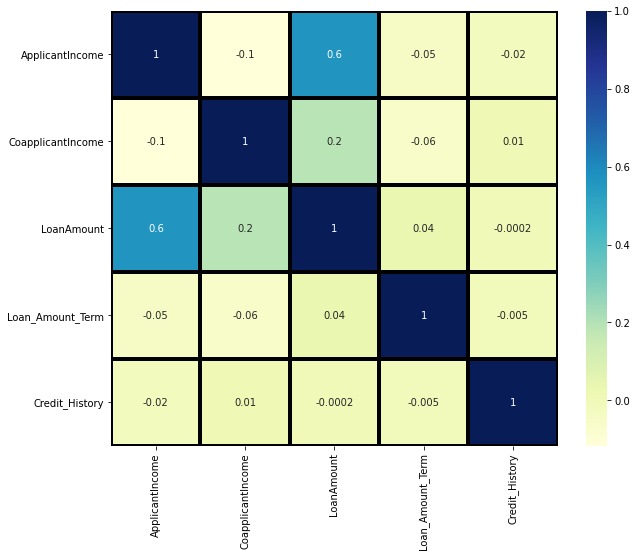

In [31]:
# check intercorrelated numeric features for multicolinearity
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_train.corr(),annot=True,cmap= 'YlGnBu',fmt='.1g',linewidths=3, linecolor='black')
plt.show()

In [33]:
list(df_train.columns)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [ ]:
# Unique values for non numeric features from dataset.
df_train[['Gender','Married','Dependents','Education','Self_Employed','Credit_History']].apply(pd.Series.value_counts)


,Gender,Married,Dependents,Education,Self_Employed,Credit_History
0.0,NaN,NaN,NaN,NaN,NaN,89.0
1.0,NaN,NaN,NaN,NaN,NaN,525.0
0,NaN,NaN,360.0,NaN,NaN,NaN
1,NaN,NaN,102.0,NaN,NaN,NaN
2,NaN,NaN,101.0,NaN,NaN,NaN
3+,NaN,NaN,51.0,NaN,NaN,NaN
Female,112.0,NaN,NaN,NaN,NaN,NaN
Graduate,NaN,NaN,NaN,480.0,NaN,NaN
Male,502.0,NaN,NaN,NaN,NaN,NaN
No,NaN,213.0,NaN,NaN,532.0,NaN


In [34]:
# select the list of categorical cols from dataset
df_train_categorical_cols =list(df_train.select_dtypes('object').columns)
list(df_train_categorical_cols)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [35]:
# Encoding of categorical features to convert to numeric
X_enc = pd.get_dummies(df_train,columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'],drop_first=True)
X_enc.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,5849,0.0,120.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,LP001003,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,LP001008,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [36]:
X_enc.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

In [38]:
# dimentions for new dataset after appliying encoding
X_enc.shape

(614, 16)

In [39]:
# seperate features and target variables.
X =X_enc.drop(['Loan_Status_Y','Loan_ID'],axis=1)
y= X_enc['Loan_Status_Y']

In [40]:
X.shape,y.shape

((614, 14), (614,))

#### Model Selection :-

In [ ]:

# checking the best models for accuracy

import pandas as pd
import matplotlib.pyplot as plt
 
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
 
from sklearn.preprocessing import OneHotEncoder
 
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline


 
estimators_dct={
                
                
                "LogisticRegression" : LogisticRegression(),
                "LogisticRegressionCV" : LogisticRegressionCV(),
                "SGDClassifier" : SGDClassifier(),
                "KNeighborsClassifier" : KNeighborsClassifier(),
                "Random Forest Classifier": RandomForestClassifier(n_estimators=20),
                "Extra Trees Classifier": ExtraTreesClassifier(),
                "Decision Tree Classifier": DecisionTreeClassifier()
                
                }
 

 
def model_selection_all(X_enc_features, y, estimator_dict):
    """
    Takes X_train, y_train datasets, an estimator dictionary -> 
    returns an ordered list based on the values of the F1 scores of the classifiers in the dictionary
    """
    # Split the data as train and test
    X_train, X_test, y_train, y_test= train_test_split(X_enc_features, y, test_size=0.30, random_state=42)
    
    f1_dct={}
    precision_dct={}
    recall_dct={}
    accuracy_dct={}
    
    # Loop over the estimator_dict keys to get each estimator 
    for estimator in estimator_dict.keys():
                
        # In the pipeline we use OneHotEncoder from Category Encoders
        model = Pipeline([('estimator', estimator_dict[estimator])])
        
        # Instantiate the classification model 
        model.fit(X_train, y_train)
        
        # Get the predictions of the model
        predicted = model.predict(X_test)
 
        # Compute and return the:
        # F1 scores (the harmonic mean of precision and recall)
        # Precision scores
        # Recall scores 
        # Accuaracy scores as separate dictionaries
        f1_dct[estimator]=round(f1_score(y_test, predicted), 4)
        precision_dct[estimator]= round(precision_score(y_test, predicted, ), 4)
        recall_dct[estimator]= round(recall_score(y_test, predicted), 4)
        accuracy_dct[estimator]= round(accuracy_score(y_test, predicted), 4)
        
    # Return the sorted list of the F1, Precision, Recall scores in descending order
    return {"Precision": sorted(precision_dct.items(), 
                                key=lambda x:x[1], 
                                reverse=True),
            
            "Recall": sorted(recall_dct.items(), 
                             key=lambda x:x[1], 
                             reverse=True),
            
            "F1": sorted(f1_dct.items(),
                         key=lambda x:x[1], 
                         reverse=True),
            
            "Accuaracy": sorted(accuracy_dct.items(), 
                             key=lambda x:x[1], 
                             reverse=True)
            
            }

In [ ]:
# Call model_selection function to get the sorted f1, precision, recall scores
model_selection_all(X, y, estimators_dct)

{'Accuaracy': [('LogisticRegression', 0.7838),
  ('LogisticRegressionCV', 0.7838),
  ('Random Forest Classifier', 0.7838),
  ('Extra Trees Classifier', 0.7568),
  ('Decision Tree Classifier', 0.6811),
  ('KNeighborsClassifier', 0.5622),
  ('SGDClassifier', 0.3568)],
 'F1': [('LogisticRegression', 0.8551),
  ('LogisticRegressionCV', 0.8551),
  ('Random Forest Classifier', 0.8496),
  ('Extra Trees Classifier', 0.8276),
  ('Decision Tree Classifier', 0.7631),
  ('KNeighborsClassifier', 0.7033),
  ('SGDClassifier', 0.0325)],
 'Precision': [('Random Forest Classifier', 0.774),
  ('Extra Trees Classifier', 0.766),
  ('LogisticRegression', 0.7564),
  ('LogisticRegressionCV', 0.7564),
  ('Decision Tree Classifier', 0.7364),
  ('SGDClassifier', 0.6667),
  ('KNeighborsClassifier', 0.6275)],
 'Recall': [('LogisticRegression', 0.9833),
  ('LogisticRegressionCV', 0.9833),
  ('Random Forest Classifier', 0.9417),
  ('Extra Trees Classifier', 0.9),
  ('KNeighborsClassifier', 0.8),
  ('Decision Tree Cl

[0.18601813 0.12001371 0.18369509 0.04878597 0.27286675 0.02313161
 0.02286975 0.02098228 0.01391417 0.01357836 0.02398707 0.02462424
 0.02521482 0.02031804]


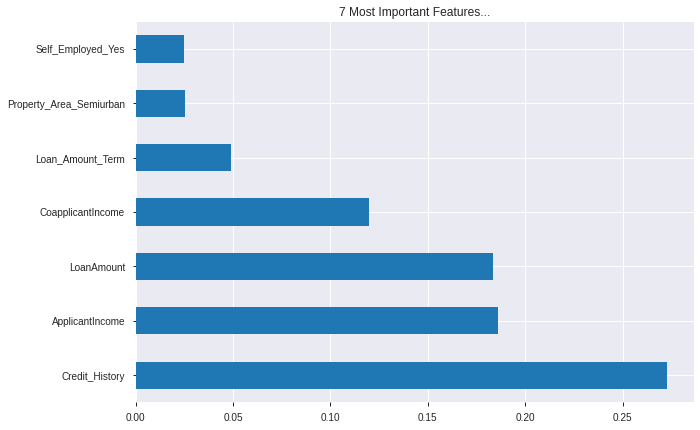

In [ ]:
# plot the 7 most important features using extra tree classifier

from sklearn.ensemble import ExtraTreesClassifier

model_features_importance=ExtraTreesClassifier()
model_features_importance.fit(X,y)

print(model_features_importance.feature_importances_)

ranked_features=pd.Series(model_features_importance.feature_importances_,index=X.columns)

plt.figure(figsize=(10,7))
ranked_features.nlargest(7).plot(kind='barh', title = '7 Most Important Features...', grid=True)
plt.show()

In [ ]:
# select 7 best features
best_7_features = list(ranked_features.nlargest(7).index)

In [ ]:
# observations using 7 best features.
X[best_7_features].head()

,Credit_History,ApplicantIncome,LoanAmount,CoapplicantIncome,Loan_Amount_Term,Property_Area_Semiurban,Self_Employed_Yes
0,1.0,5849,120.0,0.0,360.0,0,0
1,1.0,4583,128.0,1508.0,360.0,0,0
2,1.0,3000,66.0,0.0,360.0,0,1
3,1.0,2583,120.0,2358.0,360.0,0,0
4,1.0,6000,141.0,0.0,360.0,0,0


In [ ]:
# Create Logistic Regression Model
model_LR = LogisticRegression()

In [ ]:
# import GridSearchCV 
from sklearn.model_selection import GridSearchCV

In [ ]:
# split the data in training and testing sets with test size = 30%
X_train,X_test,y_train,y_test = train_test_split(X[best_7_features], y, test_size=0.30, random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((429, 7), (185, 7), (429,), (185,))

## HyperParamer tunning for LogisticRegression using GridSearchCV

In [ ]:
# HyperParamer tunning for LogisticRegression using GridSearchCV

LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
LR_search = GridSearchCV(model_LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5,scoring='accuracy')

# fitting the model for grid search 
LR_search.fit(X_train , y_train)
LR_search.best_params_
# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)

Fitting 5 folds for each of 490 candidates, totalling 2450 fits
[CV] C=0.001, max_iter=100, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l1, solver=newton-cg .............
[CV]  C=0.001, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l1, solver=lbfgs .................
[CV]  C=0.001, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.001, max_iter=100, penalty=l2, solver=newton-cg, score=0.698, total=   0.1s
[CV] C=0.001, max_iter=100, penalty=l2, solver=newton-cg .............
[CV]  C=0.001, max_iter=100, penalty=l2, solver=newton-cg, score=0.709, total=   0.1s
[CV] C=0.001, max_iter=100, penalty=l2, solver=newton-cg .............
[CV]  C=0.001, max_iter=100, penalty=l2, solver=newton-cg, score=0.709, total=   0.1s
[CV] C=0.001, max_iter=100, penalty=l2, solver=newton-cg .............
[CV]  C=0.001, max_iter=100, penalty=l2, solver=newton-cg, score=0.706, total=   0.1s
[CV] C=0.001, max_iter=100, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=100, penalty=l2, solver=lbfgs, score=0.686, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=100, penalty=l2, solver=lbfgs, score=0.686, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l2, solver=lbfgs .................
[CV]  C=0.001, max_iter=100, penalty=l2, solver=lbfgs, score=0.709

[Parallel(n_jobs=1)]: Done 2450 out of 2450 | elapsed:  1.1min finished


In [ ]:
# print the best estimator with parameters
LR_search.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# best hyperparameter values obtained using GridSearchCV
LR_search.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
# Using the best parameters to make predictions OR we can create new LR model with these params and train it again for prediction.
# prediction using GridSearchCV object.(GridSeach automatically refit the best model using all of the data )
y_pred = LR_search.predict(X_test)

In [ ]:
# find the accuaracy score
acc_score = accuracy_score(y_test,y_pred)
print('Accuaracy score on training dataset is :',acc_score)

Accuaracy score on training dataset is : 0.7837837837837838


## Hyperparameter tunning using RandomForestClassifier:-

In [ ]:

from sklearn.ensemble import RandomForestClassifier as rfc

rfbase = rfc(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

param_grid = {
    'n_estimators': [50,150,250],
    'criterion' : ['gini', 'entropy'],
    'max_features' : [0.25, 0.5, 0.75, 1.0],
    'bootstrap': [False, True],
    'max_depth':[5,10,15],
    'min_samples_split': [2, 4, 6]
}


rf_fit = GridSearchCV(estimator=rfbase, param_grid=param_grid
      , scoring = 'accuracy')

In [ ]:
rf_fit.fit(X_train[best_7_features],y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=6,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oo...lse,
                                              random_state=N

In [ ]:
rf_fit.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features=0.75,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_fit.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 0.75,
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
rf_fit.best_score_

0.8204651162790698

In [ ]:
y_pred_rf1 = rf_fit.predict(X_test[best_7_features])

In [ ]:
# find the accuaracy score
acc_score_rf = accuracy_score(y_test,y_pred_rf1)
print('Accuaracy score on training dataset is :',acc_score_rf)

Accuaracy score on training dataset is : 0.7837837837837838


# Steps to Follow Further :- 
  ### Add visualizaiton
  ### Add Pipeline
  ### think of what else can be used to imropve the accuaracy
  ### think how accuracy can be increased? -> using - normalization/standardization, any other model?


## Processing on Test Data

In [ ]:
# read test data set
df_test = pd.read_csv('Test_LoanPrediction.csv')

In [ ]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
df_test.shape

(367, 12)

In [ ]:
# check nan values in test dataset
df_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
# impute nan values in test dataset with mode values
df_test.fillna(df_test.mode().iloc[0],inplace=True)

In [ ]:
# make sure test data has not null/nan values
df_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
# convert categorical cols  to numeric for model training using pandas get dummies 
X_test_enc = pd.get_dummies(df_test,columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area'],drop_first=True)
X_test_enc_new = X_test_enc.set_index('Loan_ID')
X_test_enc_new.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,
LP001015,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
LP001022,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
LP001031,5000,1800,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
LP001035,2340,2546,100.0,360.0,1.0,1,1,0,1,0,0,0,0,1
LP001051,3276,0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1


In [ ]:
# model prediction on test data
y_test_pred = LR_search.predict(X_test_enc_new[best_7_features])
y_test_pred 

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# create dataframe with output result.
output= pd.DataFrame({'Loan_ID' : df_test['Loan_ID'], 'Loan_Status' :y_test_pred})

In [ ]:
output['Loan_Status'] = output['Loan_Status'].map({1:'Y', 0:'N'})

In [ ]:
output

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [ ]:
# export result to .csv file for submission.
output.to_csv('LoanPrediction_Result.csv',index=False)